In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
df = pd.read_csv('thyroiddataset.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [6]:
print(df.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


### Observations
* There are no missing values in the dataset 

* Since almost all the features are object types (categorical), we need to convert them to numerical values so machine learning models can work with them.

### Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # To keep track of encoders

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [28]:
print("🧠 Columns in df:", df.columns.tolist())
print("📊 Data snapshot:\n", df.head())


🧠 Columns in df: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
📊 Data snapshot:
    Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 2   
1   34       0        0           1                0                 2   
2   30       0        0           0                0                 2   
3   62       0        0           0                0                 2   
4   62       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3           3          2         1     2  0  0  0   
1                     1           3          2         1     2  0  0  0   
2                     4           3          2         1     2  0  0  0   
3                  

In [9]:
X = df.drop("Recurred", axis=1)  # All features
y = df["Recurred"]               # Target variable

In [29]:
print(X.dtypes)
print(y.unique())


Age                     int64
Gender                  int32
Smoking                 int32
Hx Smoking              int32
Hx Radiothreapy         int32
Thyroid Function        int32
Physical Examination    int32
Adenopathy              int32
Pathology               int32
Focality                int32
Risk                    int32
T                       int32
N                       int32
M                       int32
Stage                   int32
Response                int32
dtype: object
[0 1]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.95      0.86      0.90        22

    accuracy                           0.95        77
   macro avg       0.95      0.92      0.93        77
weighted avg       0.95      0.95      0.95        77

Confusion Matrix:
 [[54  1]
 [ 3 19]]
ROC-AUC Score: 0.9871900826446282


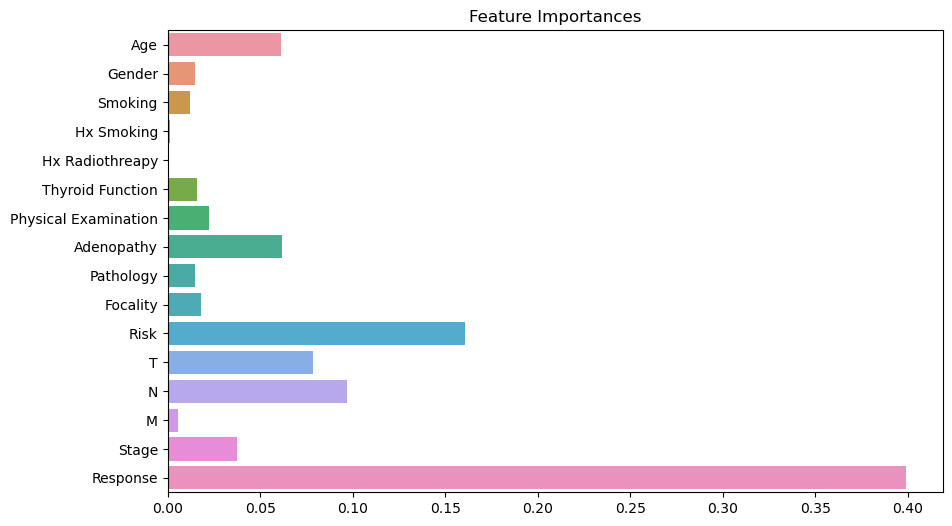

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importances")
plt.show()

### Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Mean ROC-AUC:", scores.mean())

Mean ROC-AUC: 0.988414010232192


### Observations
* Mean ROC-AUC from cross-validation is 0.988, which is exceptionally high and confirms that model is both robust and generalizes well across different data splits.



### Hyperparameter Tuning (Improve performance with grid search)

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC-AUC Score: 0.9949940968122787


### ROC Curve – shows how well the model distinguishes classes

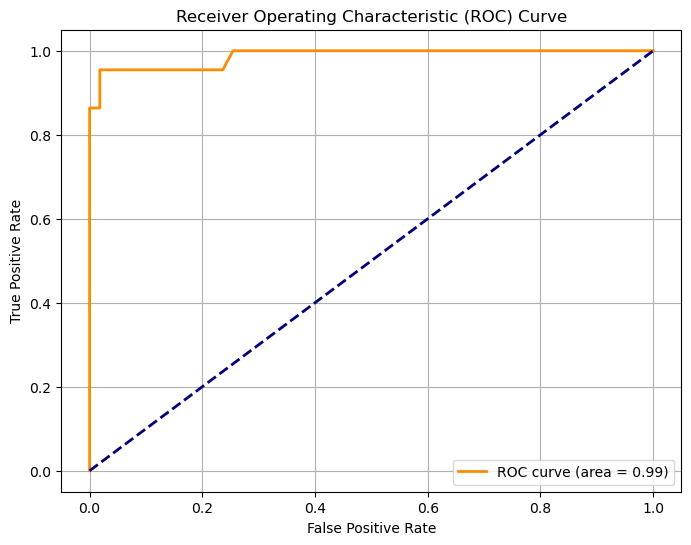

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Confusion Matrix Heatmap – makes true vs false predictions clear

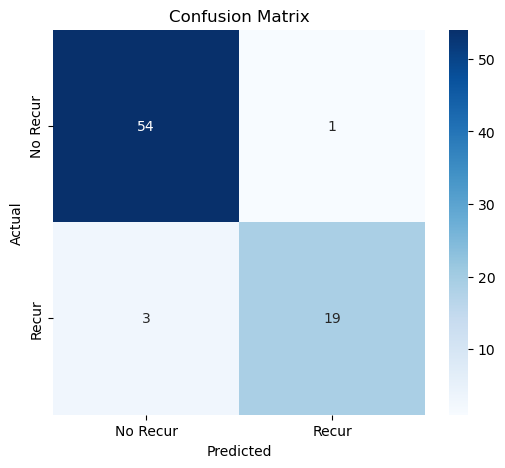

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Recur', 'Recur'], yticklabels=['No Recur', 'Recur'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Observations

* Model Generalization: The model is now even more robust and less likely to overfit

* Clinical Readiness: With a ROC-AUC this high, model is highly reliable for distinguishing between recurrence and non-recurrence cases.



In [23]:
# Retrain the Final Model with Best Params
final_model = RandomForestClassifier(
    max_depth=5,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)
final_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [24]:
from sklearn.metrics import classification_report, roc_auc_score

y_final_pred = final_model.predict(X_test)
y_final_proba = final_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_final_pred))
print("Final ROC-AUC Score:", roc_auc_score(y_test, y_final_proba))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77

Final ROC-AUC Score: 0.9900826446280991


In [25]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(final_model, X, y, cv=5, scoring='roc_auc')
print("Cross-Validated ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())


Cross-Validated ROC-AUC Scores: [0.98429752 0.99669421 0.99917355 0.9965368  0.9982684 ]
Mean ROC-AUC: 0.9949940968122787


In [26]:
# Save the model

import joblib

joblib.dump(final_model, 'thyroid_cancer_rf_model.pkl')

['thyroid_cancer_rf_model.pkl']

In [27]:
pwd

'C:\\Users\\akshitha alluri\\ThyroidCancerRecurrencePrediction'